<a href="https://colab.research.google.com/github/arthurnovello/ECM514-Ciencia_dos_Dados/blob/master/tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de Tweets - ECM514

In [ ]:
# Imports
import nltk
nltk.download('popular')
nltk.download('wordnet')
import pandas as pd
import numpy as np
import re
import unicodedata
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
from string import punctuation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ecm514_datasets/tweets.csv', sep = ",", encoding = "ISO-8859-1", header = None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df[0].unique()

array([0, 4])

# Tratamento

In [ ]:
df[0].replace({4:1},inplace = True)
df[0].unique()
df[0].value_counts()

1    800000
0    800000
Name: 0, dtype: int64

In [ ]:
df[3].unique()

array(['NO_QUERY'], dtype=object)

In [ ]:
print(df[0].value_counts())

1    800000
0    800000
Name: 0, dtype: int64


## Removendo URLs

In [ ]:
def remove_url(string):
  return re.sub(r"http[s]?:\/\/(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", string, flags=re.MULTILINE)

In [ ]:
df[5] = df[5].apply(remove_url)

In [ ]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot - Awww, that's a bummer. You sho..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Removendo Usuarios

In [ ]:
def remove_username(string):
  return re.sub(r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9-_]+)", "", string, flags=re.MULTILINE)

In [ ]:
df[5] = df[5].apply(remove_username)

In [ ]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Da..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am..."


## Removendo Hashtags

In [ ]:
def remove_hashtag(string):
  return re.sub(r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9-_]+)", "", string, flags=re.MULTILINE)

In [ ]:
df[5] = df[5].apply(remove_hashtag)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Da..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am..."


## Removendo marcador de retweet

In [ ]:
def remove_rt(string):
  return re.sub(r"\b(RT|rt)\b", "", string, flags=re.MULTILINE)

In [ ]:
df[5] = df[5].apply(remove_rt)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Da..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am..."


## Removendo Emojis

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
df[5] = df[5].apply(remove_emoji)

## Tokenizando a mensagem

In [ ]:
df['5_token'] = df[5].apply(word_tokenize)

In [ ]:
df.head()

,0,1,2,3,4,5,5_token
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Da...","[-, Awww, ,, that, 's, a, bummer, ., You, shou..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,"[is, upset, that, he, ca, n't, update, his, Fa..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...,"[I, dived, many, times, for, the, ball, ., Man..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am...","[no, ,, it, 's, not, behaving, at, all, ., i, ..."


## Removendo Acentos

In [ ]:
def remove_acento( frase_tokenizada ):
    frase = []
    for palavra in frase_tokenizada:
        palavra = palavra.replace('á','a')
        palavra = palavra.replace('é','e')
        palavra = palavra.replace('í','i')
        palavra = palavra.replace('ó','o')
        palavra = palavra.replace('ú','u')
        palavra = palavra.replace('ã','a')
        palavra = palavra.replace('õ','o')
        palavra = palavra.replace('ç','c')
        palavra = palavra.replace('â','a')
        palavra = palavra.replace('ê','e')
        palavra = palavra.replace('î','i')
        palavra = palavra.replace('ô','o')
        palavra = palavra.replace('û','u')
        palavra = palavra.replace('à','a')
        palavra = palavra.replace('è','e')
        palavra = palavra.replace('ì','i')
        palavra = palavra.replace('ò','o')
        palavra = palavra.replace('ù','u')
        frase.append( palavra )
    return frase

In [ ]:
df['5_token'] = df['5_token'].apply(remove_acento)

## Removendo mensagens não alpha

In [ ]:
def no_alphas( frase_tokenizada ):
    return [palavra for palavra in frase_tokenizada if (palavra.isalpha())]

In [ ]:
df['5_token'] = df['5_token'].apply(no_alphas)

In [ ]:
df.head()

,0,1,2,3,4,5,5_token
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Da...","[Awww, that, a, bummer, You, shoulda, got, Dav..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,"[is, upset, that, he, ca, update, his, Faceboo..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...,"[I, dived, many, times, for, the, ball, Manage..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"[my, whole, body, feels, itchy, and, like, its..."
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am...","[no, it, not, behaving, at, all, i, mad, why, ..."


## Removendo Stop Words

In [ ]:
stopWords = stopwords.words('english')
stw = list( set( stopWords + list(punctuation) ) )
def remove_stops( frase_tokenizada, stopwords_pt ):
    w_token_1_sem_stopwords = [palavra for palavra in frase_tokenizada if palavra not in stopwords_pt]
    return w_token_1_sem_stopwords

In [ ]:
df['5_token'] = df['5_token'].apply(remove_stops, stopwords_pt = stw)

In [ ]:
df.head()

,0,1,2,3,4,5,5_token
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Da...","[Awww, bummer, You, shoulda, got, David, Carr,..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,"[upset, ca, update, Facebook, texting, might, ..."
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...,"[I, dived, many, times, ball, Managed, save, T..."
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"[whole, body, feels, itchy, like, fire]"
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am...","[behaving, mad, I, ca, see]"


## Lemmatizando a mensagem

In [ ]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def lemm(frase_tokenizada):
  frase_lemm = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in frase_tokenizada]
  return frase_lemm

In [ ]:
df['5_token'] = df['5_token'].apply(lemm)

## Reconstruindo a mensagem tokenizada

In [ ]:
def reconstroi(frase_tokenizada):
  return ' '.join(frase_tokenizada)

In [ ]:
df[6] = df['5_token'].apply(reconstroi)

In [ ]:
df.head()

,0,1,2,3,4,5,5_token,6
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Da...","[Awww, bummer, You, shoulda, get, David, Carr,...",Awww bummer You shoulda get David Carr Third D...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,"[upset, ca, update, Facebook, texting, might, ...",upset ca update Facebook texting might cry res...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...,"[I, dive, many, time, ball, Managed, save, The...",I dive many time ball Managed save The rest go...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"[whole, body, feel, itchy, like, fire]",whole body feel itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am...","[behaving, mad, I, ca, see]",behaving mad I ca see


# Treinamento

In [ ]:
x = df[6].values
y = df[0]

In [ ]:
x_treino, x_test, y_treino, y_test  = train_test_split( x, y, test_size = 0.25 )

print(x_treino.shape)
print(x_test.shape)

(1200000,)
(400000,)


## Bag of Words

In [ ]:
vect = CountVectorizer(analyzer='word')
vect.fit(x_treino)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
print(len(vect.vocabulary_))

200803


## Vocabulario

In [ ]:
vect = CountVectorizer(analyzer='word', min_df=0.0002,max_df=0.8)
vect.fit(x_treino)
print(len(vect.vocabulary_))

3196


In [ ]:
print(vect.vocabulary_)

{'lol': 1603, 'husband': 1346, 'love': 1624, 'seem': 2372, 'code': 530, 'us': 2949, 'too': 2833, 'bad': 203, 'do': 758, 'get': 1098, 'breakfast': 351, 'ahh': 51, 'side': 2436, 'grass': 1153, 'blame': 290, 'woman': 3104, 'smile': 2489, 'the': 2753, 'west': 3044, 'valley': 2960, 'store': 2610, 'read': 2210, 'book': 318, 'remember': 2245, 'feel': 968, 'wish': 3090, 'suddenly': 2645, 'awful': 186, 'mood': 1777, 'maybe': 1691, 'delete': 696, 'dont': 773, 'hear': 1245, 'happy': 1212, 'at': 159, 'least': 1551, 'nothing': 1888, 'ca': 407, 'find': 990, 'one': 1927, 'change': 459, 'look': 1609, 'original': 1948, 'leave': 1552, 'often': 1912, 'people': 2016, 'keep': 1485, 'pay': 2009, 'drink': 794, 'oh': 1913, 'yeah': 3161, 'to': 2816, 'chelsea': 478, 'dollar': 768, 'wtf': 3139, 'time': 2804, 'start': 2586, 'save': 2339, 'much': 1802, 'give': 1109, 'it': 1417, 'tough': 2846, 'hey': 1267, 'beautiful': 241, 'we': 3024, 'wo': 3099, 'make': 1654, 'yo': 3174, 'baseball': 221, 'game': 1083, 'ran': 2198

In [ ]:
bow_x_treino = vect.transform(x_treino)
bow_x_test = vect.transform(x_test)

In [ ]:
bow_x_treino.shape

(1200000, 3196)

## Modelo

In [ ]:
model = MultinomialNB()
model.fit(bow_x_treino,y_treino)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Score

In [ ]:
print(model.score(bow_x_treino,y_treino))
print(model.score(bow_x_test,y_test))

0.7542341666666666
0.7531025


## Teste do Modelo

 * Frases 1, 3 e 6 são positivas
 * Frases 2 e 5 são negativas
 * Frase 4  ambigua

In [ ]:
texto_teste = ['there’s nothing!!! nothing!!! that motivates and inspires me more than seeing young creatives in my city doing their thing... community!!!',
                'they are unbearably ugly',
                'I have evidence that friends are angels',
                'the obsession with who did it first is limiting creativity',
               'I’m so desperate to interact with a new person I’d let them “explain” blockchain.',
               'finding the PDF is a different type of high'
               ]

In [ ]:
bow_texto_teste = vect.transform(texto_teste)

In [ ]:
saida_de_teste = model.predict(bow_texto_teste)

In [ ]:
dict_resposta = {0:'Negativo',1:'Positivo'}
for i in saida_de_teste:
  print(dict_resposta[i])

Positivo
Negativo
Positivo
Positivo
Positivo
Positivo


## Matriz de Confusão

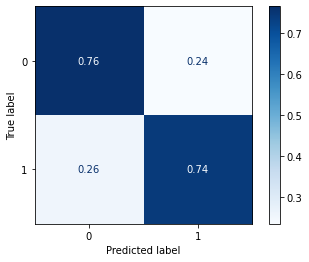

In [ ]:
plot_confusion_matrix(estimator=model,X=bow_x_treino,y_true=y_treino,normalize='true',cmap=plt.cm.Blues)

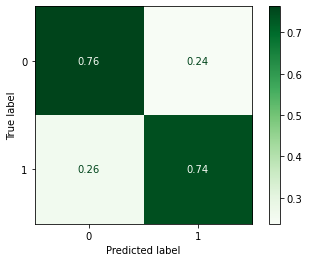

In [ ]:
plot_confusion_matrix(estimator=model,X=bow_x_test,y_true=y_test,normalize='true',cmap=plt.cm.Greens)